# Convolutional Neural Network (CNN)

이미지의 공간적 특징을 효과적으로 추출하기 위해 컨볼루션 연산을 사용하는 심층 신경망 구조

## 모델 구조
- 특징 추출부: 컨볼루션 층 + 풀링 층
- 분류부: 완전 연결 층

### 컨볼루션 연산
```
# 2D 컨볼루션
출력[i,j] = Σ Σ (입력[i+k,j+l] × 필터[k,l])

# 편향 추가 및 활성화
특징 맵 = ReLU(컨볼루션 출력 + 편향)
```

### 주요 구성 요소
- **컨볼루션 층**:
  - 필터(커널)로 특징 추출
  - 파라미터 공유로 효율적 학습
  - 지역적 특징 감지 가능

- **풀링 층**:
  - 공간적 크기 축소
  - 주요 특징 보존
  - 위치 불변성 제공
  - 파라미터 없음

- **활성화 함수 (ReLU)**:
  - max(0,x) 연산으로 비선형성 추가
  - 기울기 소실 문제 감소
  - 빠른 학습 속도

## 하이퍼파라미터
- **필터 크기**: 특징을 감지할 영역 크기 (예: 3×3, 5×5)
- **스트라이드**: 필터 이동 간격
- **패딩**: 입력 주변 채우기 방식
- **필터 개수**: 추출할 특징 맵의 수

## 장점
- 이미지의 계층적 특징 학습
- 파라미터 공유로 효율적 학습
- 위치 불변성으로 강건한 특징 추출
- 다양한 컴퓨터 비전 작업에 높은 성능

## 한계점
- 대량의 학습 데이터 필요
- 회전된 객체 인식에 취약
- 계산 비용이 높음
- 블랙박스 특성으로 해석 어려움

## 모델 구조

- **입력 이미지**: `(8, 8)` → 8x8 크기의 흑백 이미지 (1개의 채널)

- **컨볼루션 레이어**:
  - **필터 크기**: `(3, 3)` → 3x3 크기의 수직 엣지 검출 필터
  - **출력 크기**: `(6, 6)` → 패딩 없이 유효(valid) 패딩 적용
    - 계산: 8(입력) - 3(필터) + 1 = 6

- **ReLU 활성화**:
  - **입력/출력 크기**: `(6, 6)` → 크기 변화 없음
  - 음수값을 0으로 변환하는 비선형성 추가

- **Max Pooling**:
  - **풀링 크기**: `(2, 2)` → 2x2 영역에서 최대값 선택
  - **stride**: 2 → 2칸씩 이동
  - **출력 크기**: `(3, 3)` → 6÷2 = 3

---

### 컨볼루션 연산 설명

컨볼루션 연산은 입력 이미지를 필터가 슬라이딩하면서 각 위치에서 요소별 곱셈의 합을 계산합니다. 3x3 필터를 사용할 경우, 입력 이미지의 3x3 패치와 필터 간의 곱셈-합 연산이 수행됩니다.

**핵심 포인트**
1. 차이 기반 검출
   - 필터의 양수/음수 값은 "이 위치들 간의 차이를 봐라"라는 의미
   - 차이가 클수록 해당 특징이 강하게 존재한다는 의미
2. 패턴의 방향성
   - 필터의 가중치 배치에 따라 다른 방향의 패턴 검출
   - 예: 수직, 수평, 대각선 등
3. 특징의 강도
   - 값의 차이가 클수록 더 강한 특징으로 인식
   - 예: 흑백 경계가 뚜렷할수록 엣지 검출값이 커짐

이것이 CNN이 이미지의 특징을 학습하는 기본 원리이며, 실제 CNN에서는 이러한 필터의 값들을 데이터로부터 자동으로 학습합니다.

### Max Pooling 설명
Max Pooling은 특정 영역(여기서는 2x2)에서 가장 큰 값만을 선택하여 출력합니다. 이는 공간적 크기를 줄이고 주요 특징을 보존하는 역할을 합니다.

# 예시 이미지 만들기

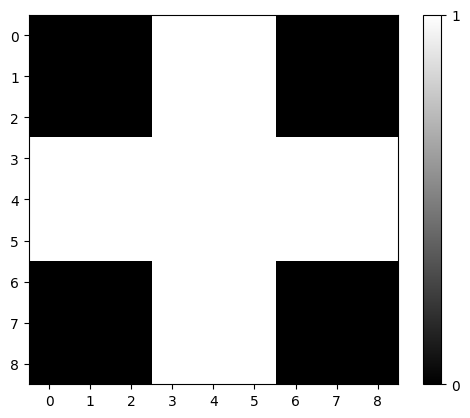

In [21]:
import numpy as np
import matplotlib.pyplot as plt

image = np.zeros((9,9))
image[3:6, :] = 1  # 3,4,5 행을 1로 설정 (더 넓은 가로선)
image[:, 3:6] = 1  # 3,4,5 열을 1로 설정 (더 넓은 세로선)

plt.imshow(image, cmap='gray')
plt.colorbar(ticks=[0, 1])
plt.xticks(np.arange(0, 9, 1))
plt.yticks(np.arange(0, 9, 1))
plt.show()

# 1.컨볼루션 적용
컨볼루션 결과 (7x7):
- 중앙의 5.0: 완벽한 십자가 패턴 매치
- 2.0: 부분적인 패턴 매치
- 1.0: 약한 패턴 매치
- 0.0: 패턴 없음

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 이미지와 필터 생성
image = np.zeros((9, 9))
image[4, 3:6] = 1  # 가로선
image[3:6, 4] = 1  # 세로선

cross_filter = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# 컨볼루션 결과 계산
output_size = image.shape[0] - cross_filter.shape[0] + 1
conv_output = np.zeros((output_size, output_size))

for i in range(output_size):
    for j in range(output_size):
        patch = image[i:i+3, j:j+3]
        conv_output[i, j] = np.sum(patch * cross_filter)

# DataFrame으로 변환
df = pd.DataFrame(conv_output)

# 결과 출력
print("컨볼루션 결과:")
print(df)

컨볼루션 결과:
     0    1    2    3    4    5    6
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  2.0  2.0  2.0  0.0  0.0
3  0.0  1.0  2.0  5.0  2.0  1.0  0.0
4  0.0  0.0  2.0  2.0  2.0  0.0  0.0
5  0.0  0.0  0.0  1.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0


# 2. ReLU 활성화
- 비선형성 추가
- 기울기 소실 문제 해결
- 계산 효율성

In [31]:
# 음수값을 0으로 만들기 (이 예제에서는 음수가 없지만, 일반적으로 필요)
relu_output = np.maximum(0, conv_output)

print("ReLU 결과:")
print(pd.DataFrame(relu_output))

ReLU 결과:
     0    1    2    3    4    5    6
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  2.0  2.0  2.0  0.0  0.0
3  0.0  1.0  2.0  5.0  2.0  1.0  0.0
4  0.0  0.0  2.0  2.0  2.0  0.0  0.0
5  0.0  0.0  0.0  1.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0


# 3. Max Pooling (2x2 크기, stride 2)
- 특정 영역에서 최대값만을 선택하여 크기를 줄이는 연산(특징이 약간 이동해도 동일한 결과)
- 크기 축소 및 주요 특징 보존

- Max Pooling 결과 (3x3):
  - 특징을 보존하면서 크기 축소
  - 가장 강한 특징만 남김
  - 위치 불변성 제공

In [32]:
pool_size = 2
stride = 2 
pooled_size = (relu_output.shape[0] - pool_size) // stride + 1
pooled_output = np.zeros((pooled_size, pooled_size))

for i in range(pooled_size):
    for j in range(pooled_size):
        # stride를 사용한 인덱싱
        row_start = i * stride
        row_end = row_start + pool_size
        col_start = j * stride
        col_end = col_start + pool_size
        
        pooled_output[i, j] = np.max(relu_output[row_start:row_end, col_start:col_end])

print("\nMax Pooling 결과 (2x2):")
print(pd.DataFrame(pooled_output))


Max Pooling 결과 (2x2):
     0    1    2
0  0.0  1.0  0.0
1  1.0  5.0  2.0
2  0.0  2.0  2.0


# 결과 시각화

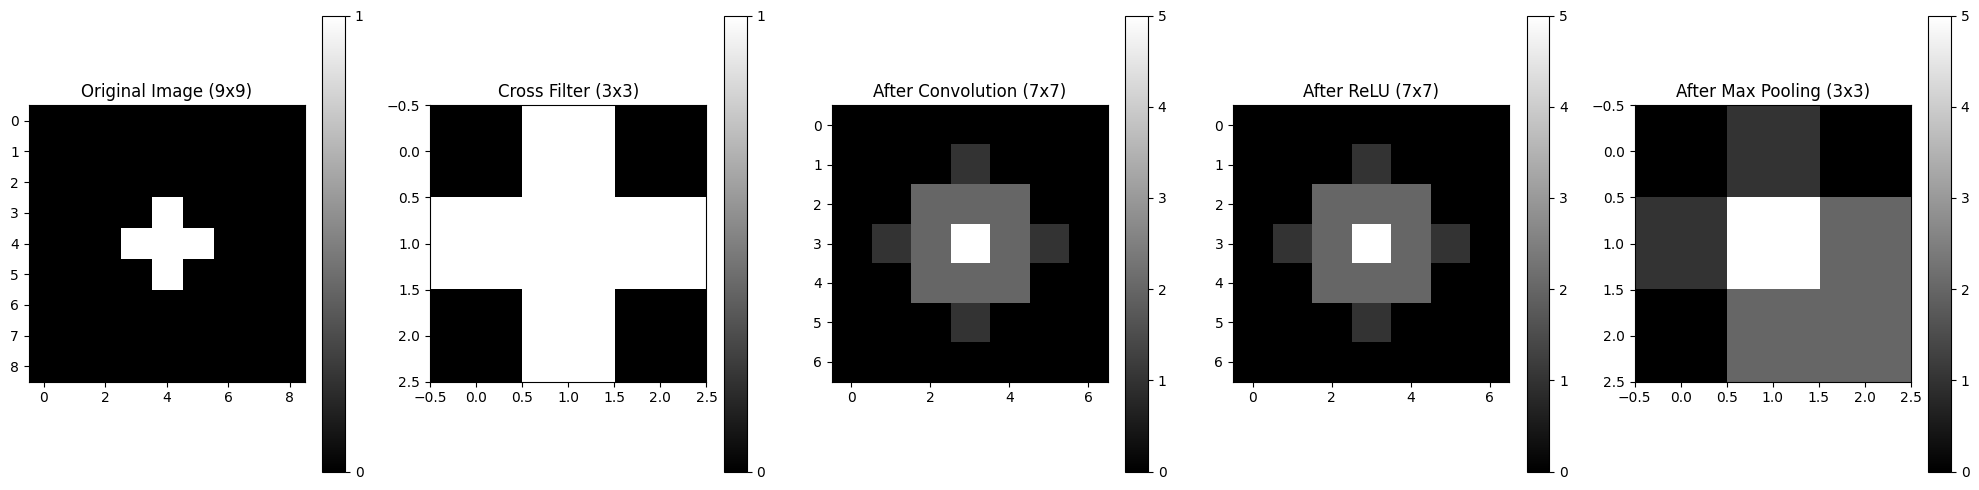

Original image shape: (9, 9)
Filter shape: (3, 3)
After convolution shape: (7, 7)
After ReLU shape: (7, 7)
After max pooling shape: (3, 3)


In [33]:

# 시각화
plt.figure(figsize=(20, 5))

# 원본 이미지
plt.subplot(151)
plt.imshow(image, cmap='gray')
plt.title('Original Image (9x9)')
plt.colorbar(ticks=[0, 1])

# 필터
plt.subplot(152)
plt.imshow(cross_filter, cmap='gray')
plt.title('Cross Filter (3x3)')
plt.colorbar(ticks=[0, 1])

# 컨볼루션 결과
plt.subplot(153)
plt.imshow(conv_output, cmap='gray')
plt.title('After Convolution (7x7)')
plt.colorbar()

# ReLU 결과
plt.subplot(154)
plt.imshow(relu_output, cmap='gray')
plt.title('After ReLU (7x7)')
plt.colorbar()

# Max Pooling 결과
plt.subplot(155)
plt.imshow(pooled_output, cmap='gray')
plt.title('After Max Pooling (3x3)')
plt.colorbar()

plt.tight_layout()
plt.show()

# 각 단계별 출력 크기 확인
print(f"Original image shape: {image.shape}")
print(f"Filter shape: {cross_filter.shape}")
print(f"After convolution shape: {conv_output.shape}")
print(f"After ReLU shape: {relu_output.shape}")
print(f"After max pooling shape: {pooled_output.shape}")

# MNIST 예시

즉, CNN은:
- 앞부분: 이미지에서 유용한 특징을 추출 (conv + relu + pool)
- 뒷부분: 추출된 특징을 기반으로 분류 (flatten + FC + softmax)

이렇게 두 부분이 합쳐진 구조입니다! 학습도 두 부분 모두에서 일어나야 합니다.

## Part1. 특징추출

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# MNIST 데이터 로드 (scikit-learn의 간소화된 버전)
def load_mnist_data():
    """MNIST 데이터 로드 및 전처리"""
    digits = load_digits()
    X = digits.images
    y = digits.target
    # 0-1 사이로 정규화
    X = X / 16.0
    return X, y

In [68]:
def initialize_filters(n_filters=16, filter_size=3):
    """컨볼루션 필터 초기화"""
    # He 초기화 사용
    filters = np.random.randn(n_filters, filter_size, filter_size) * np.sqrt(2.0 / (filter_size * filter_size))
    return filters

In [69]:
def add_padding(image, padding_size, mode='zero'):
    """패딩 추가 함수"""
    if mode == 'zero':
        padded = np.pad(image, padding_size, mode='constant', constant_values=0)
    elif mode == 'edge':
        padded = np.pad(image, padding_size, mode='edge')
    elif mode == 'mirror':
        padded = np.pad(image, padding_size, mode='reflect')
    return padded

In [79]:
# def convolution(image, filters):
#     """컨볼루션 연산 수행"""
#     n_filters = filters.shape[0]
#     filter_size = filters.shape[1]
#     output_size = image.shape[0] - filter_size + 1
    
#     # 모든 필터에 대한 출력을 저장할 배열
#     conv_outputs = np.zeros((n_filters, output_size, output_size))
    
#     # 각 필터별로 컨볼루션 수행
#     for k in range(n_filters):
#         for i in range(output_size):
#             for j in range(output_size):
#                 patch = image[i:i+filter_size, j:j+filter_size]
#                 conv_outputs[k,i,j] = np.sum(patch * filters[k])
#     return conv_outputs

def convolution(image, filters, padding=True):
    """컨볼루션 연산 수행"""
    n_filters = filters.shape[0]
    filter_size = filters.shape[1]
    
    if padding:
        # 패딩 추가
        padding_size = filter_size // 2
        padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)  #제로패딩
        output_size = image.shape[0]  # 원본 크기 유지
    else:
        padded_image = image
        output_size = image.shape[0] - filter_size + 1
    
    # 모든 필터에 대한 출력을 저장할 배열
    conv_outputs = np.zeros((n_filters, output_size, output_size))
    
    # 각 필터별로 컨볼루션 수행
    for k in range(n_filters):
        for i in range(output_size):
            for j in range(output_size):
                patch = padded_image[i:i+filter_size, j:j+filter_size]
                conv_outputs[k,i,j] = np.sum(patch * filters[k])
                
    return conv_outputs


In [80]:
def relu(feature_maps):
    """ReLU 활성화 함수"""
    return np.maximum(0, feature_maps)

In [81]:
def max_pooling(feature_maps, pool_size=2, stride=2):
    """Max Pooling 연산"""
    n_filters = feature_maps.shape[0]
    input_size = feature_maps.shape[1]
    output_size = (input_size - pool_size) // stride + 1
    
    pooled = np.zeros((n_filters, output_size, output_size))
    
    for k in range(n_filters):
        for i in range(output_size):
            for j in range(output_size):
                row_start = i * stride
                row_end = row_start + pool_size
                col_start = j * stride
                col_end = col_start + pool_size
                patch = feature_maps[k, row_start:row_end, col_start:col_end]
                pooled[k,i,j] = np.max(patch)
                
    return pooled

In [87]:
def visualize_filters(filters):
    """필터 시각화"""
    n_filters = filters.shape[0]
    n_cols = 8
    n_rows = (n_filters + n_cols - 1) // n_cols
    
    plt.figure(figsize=(n_cols*2, n_rows*2))
    for i in range(n_filters):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(filters[i], cmap='gray')
        plt.title(f'Filter {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_feature_maps(feature_maps, title):
    """특징 맵 시각화"""
    n_filters = feature_maps.shape[0]
    n_cols = 8
    n_rows = (n_filters + n_cols - 1) // n_cols
    
    # figsize 조정 및 여백 추가
    plt.figure(figsize=(20, 5))
    
    for i in range(n_filters):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(feature_maps[i], cmap='gray')
        plt.title(f'Map {i+1}')
        plt.axis('off')
    
    # 전체 타이틀 위치 조정
    plt.suptitle(title, y=1.05, fontsize=12)
    plt.tight_layout()
    plt.show()

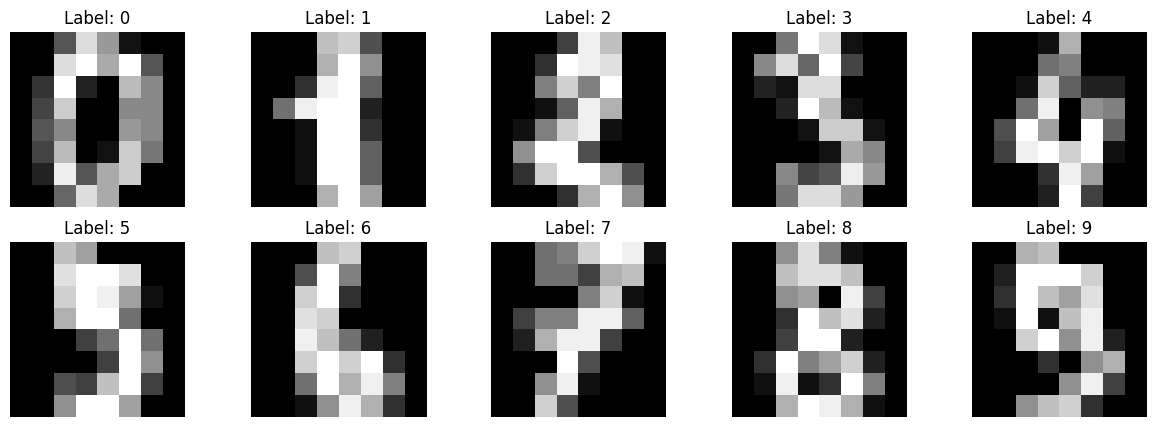

이미지 크기: (1797, 8, 8)
레이블: [0 1 2 3 4 5 6 7 8 9]


In [88]:
# 1. 데이터 로드
X, y = load_mnist_data()
sample_idx = np.where(y == 5)[0][0]  # 숫자 5 선택
image = X[sample_idx]

# 데이터 확인
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

print("이미지 크기:", X.shape)  # (1797, 8, 8) - 1797개의 8x8 이미지
print("레이블:", np.unique(y))  # 0부터 9까지의 숫자

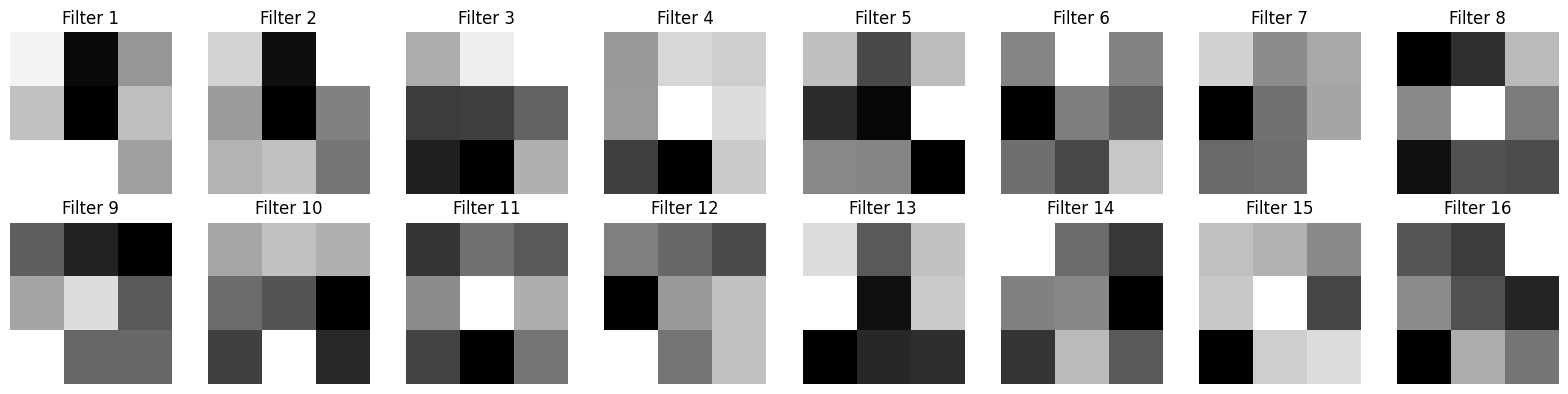

In [89]:
# 2. 필터 초기화
filters = initialize_filters(n_filters=16, filter_size=3)

# 3. 필터 시각화
visualize_filters(filters)


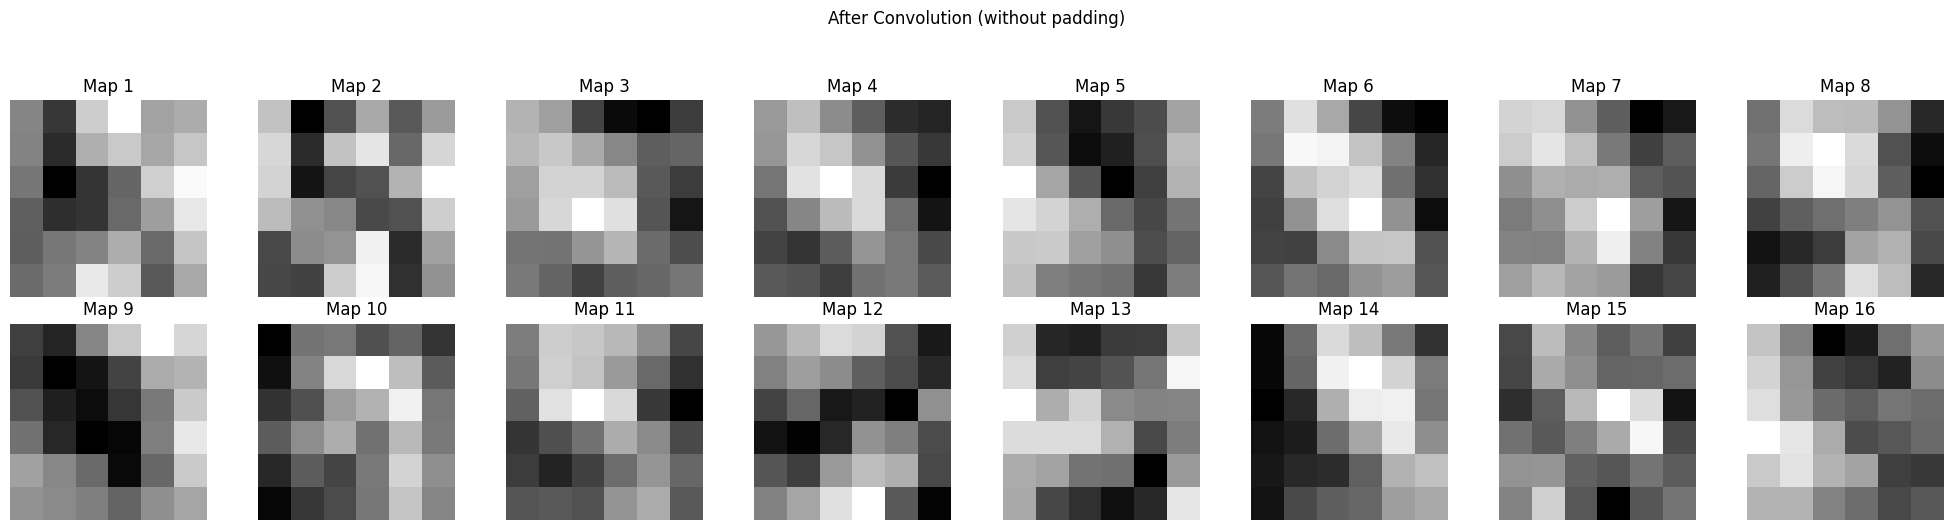

In [90]:
# 4. 컨볼루션 수행 (패딩 미적용)
conv_outputs = convolution(image, filters, padding=False)  # padding=False 추가
visualize_feature_maps(conv_outputs, "After Convolution (without padding)")

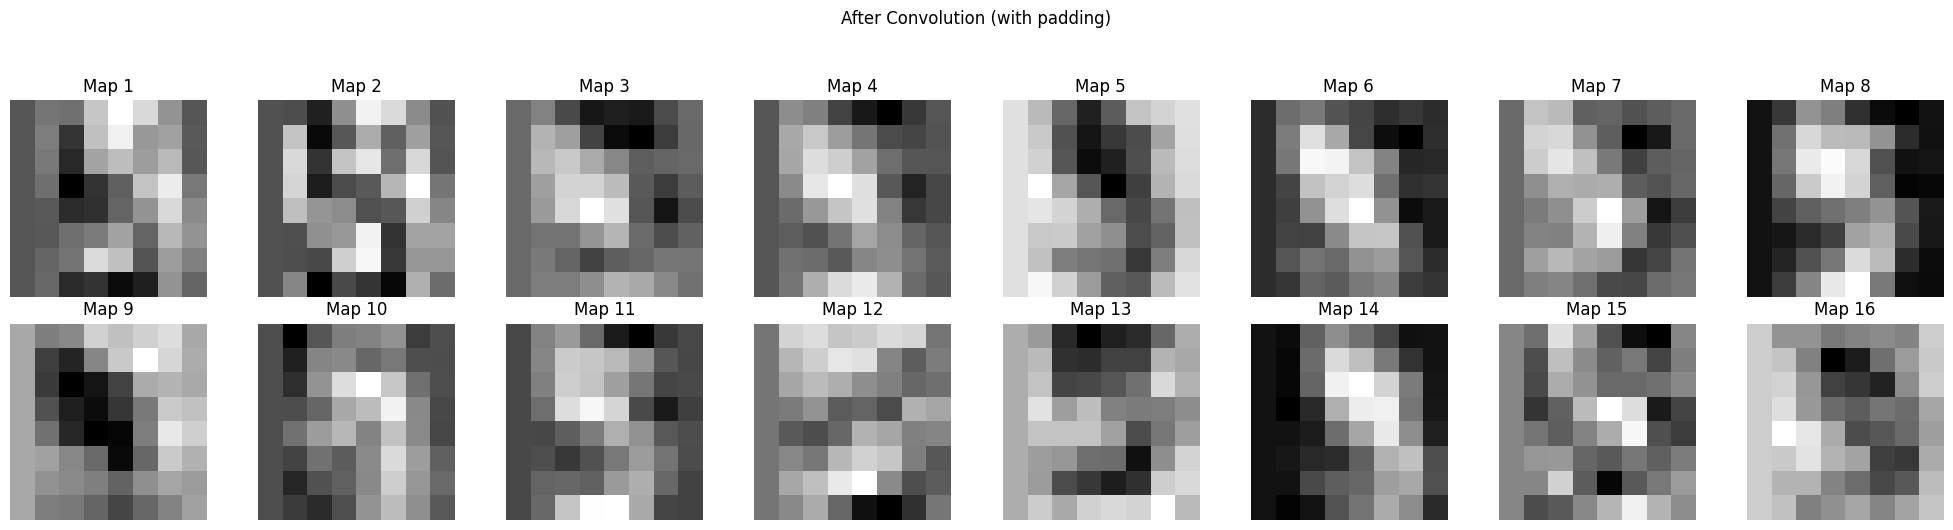

In [91]:
# # 4. 컨볼루션 수행
# conv_outputs = convolution(image, filters)
# visualize_feature_maps(conv_outputs, "After Convolution")
# 4. 컨볼루션 수행 (패딩 적용)
conv_outputs = convolution(image, filters, padding=True)  # padding=True 추가
visualize_feature_maps(conv_outputs, "After Convolution (with padding)")

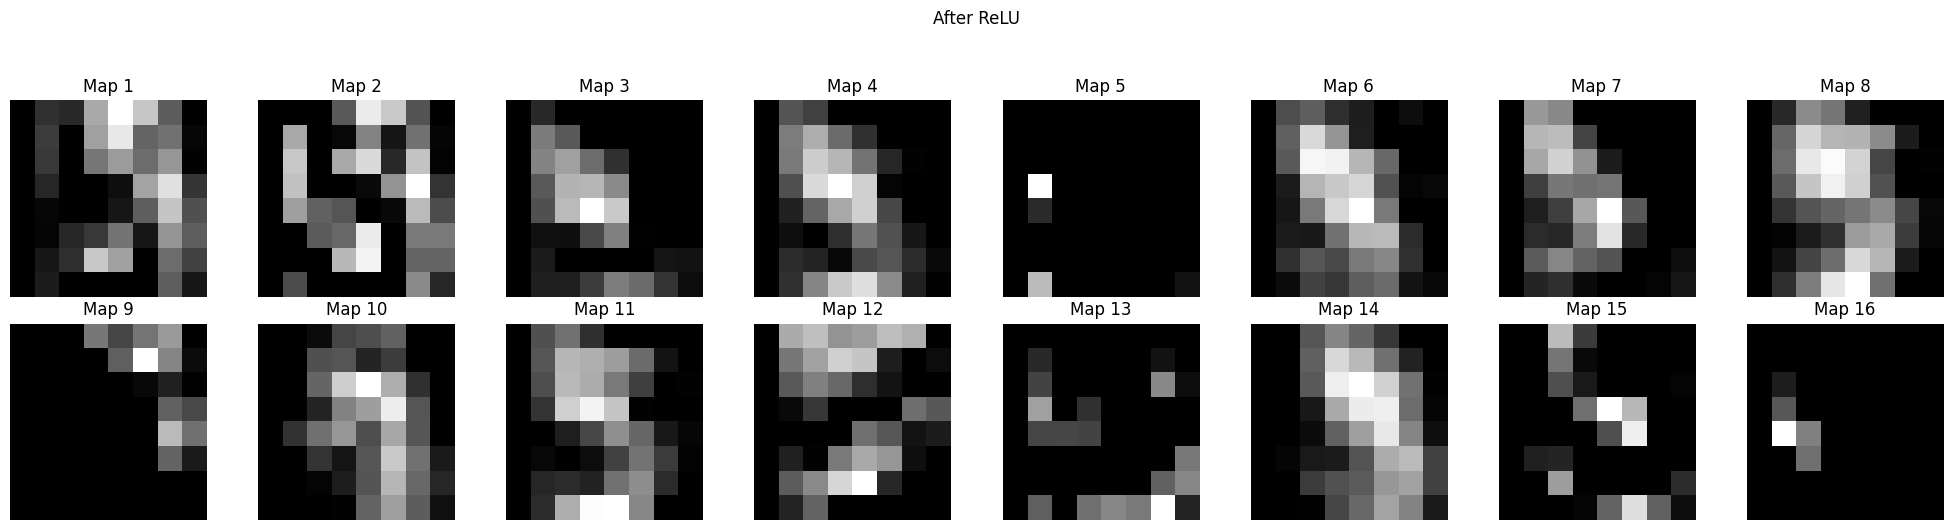

In [92]:
# 5. ReLU 적용
relu_outputs = relu(conv_outputs)
visualize_feature_maps(relu_outputs, "After ReLU")

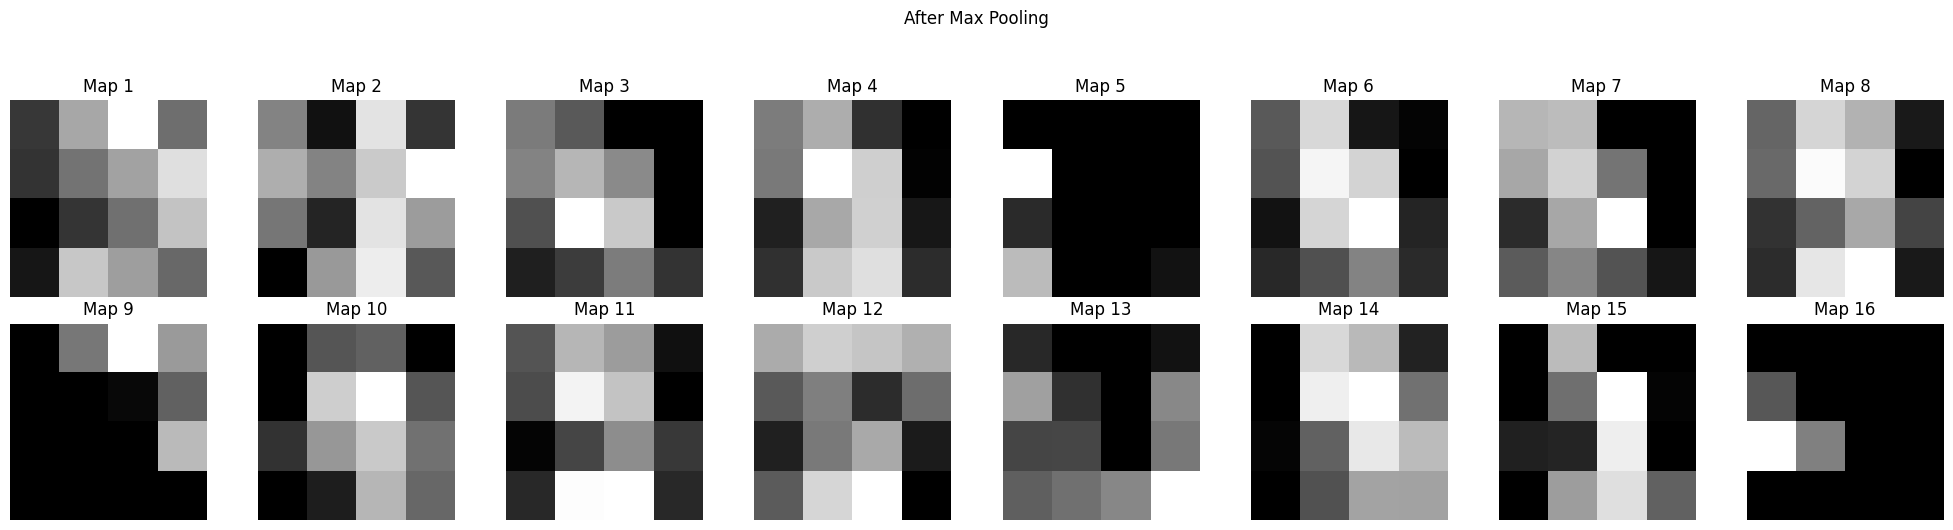

In [93]:
# 6. Max Pooling
pooled_outputs = max_pooling(relu_outputs)
visualize_feature_maps(pooled_outputs, "After Max Pooling")

In [94]:
# 7. 크기 변화 확인
print("원본 이미지 크기:", image.shape)
print("컨볼루션 출력 크기:", conv_outputs.shape)
print("ReLU 출력 크기:", relu_outputs.shape)
print("Max Pooling 출력 크기:", pooled_outputs.shape)

원본 이미지 크기: (8, 8)
컨볼루션 출력 크기: (16, 8, 8)
ReLU 출력 크기: (16, 8, 8)
Max Pooling 출력 크기: (16, 4, 4)


## Part2. 분류기 구현

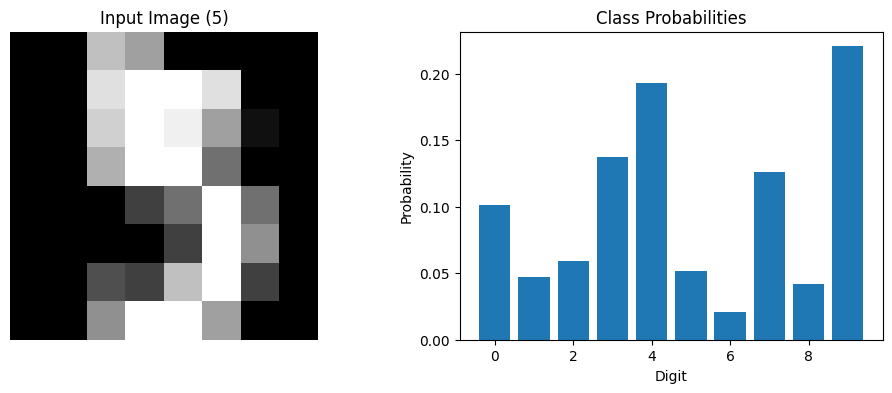

예측된 클래스: 9
실제 클래스: 5


In [95]:
def flatten(feature_maps):
    """3D 특징맵을 1D로 평탄화"""
    # (16, 4, 4) → (256,) : 16*4*4 = 256
    return feature_maps.reshape(feature_maps.shape[0], -1)

def initialize_fc_layer(input_size, output_size):
    """FC 층의 가중치와 편향 초기화"""
    weights = np.random.randn(input_size, output_size) * np.sqrt(2.0/input_size)
    bias = np.zeros(output_size)
    return weights, bias

def fc_forward(flattened, weights, bias):
    """FC 층의 순전파"""
    return np.dot(flattened, weights) + bias

def softmax(x):
    """소프트맥스 함수"""
    exp_x = np.exp(x - np.max(x))  # 수치 안정성을 위해 최대값 빼기
    return exp_x / np.sum(exp_x)

# 전체 추론 과정
def predict(image, filters, fc_weights, fc_bias):
    """전체 CNN 추론 과정"""
    # 1. 컨볼루션 + ReLU + 풀링
    conv_out = convolution(image, filters, padding=True)
    relu_out = relu(conv_out)
    pool_out = max_pooling(relu_out)
    
    # 2. 평탄화
    flattened = pool_out.reshape(-1)  # (256,)
    
    # 3. FC층
    fc_out = fc_forward(flattened, fc_weights, fc_bias)
    
    # 4. Softmax
    probabilities = softmax(fc_out)
    
    return probabilities

# 사용 예시
# 가중치 초기화
n_features = 16 * 4 * 4  # 풀링 출력을 평탄화한 크기
n_classes = 10  # MNIST는 0-9까지 10개 클래스
fc_weights, fc_bias = initialize_fc_layer(n_features, n_classes)

# 예측
sample_idx = np.where(y == 5)[0][0]
image = X[sample_idx]
probs = predict(image, filters, fc_weights, fc_bias)

# 결과 출력
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Input Image (5)')
plt.axis('off')

plt.subplot(122)
plt.bar(range(10), probs)
plt.title('Class Probabilities')
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.show()

print("예측된 클래스:", np.argmax(probs))
print("실제 클래스:", y[sample_idx])

# Keras를 사용한 예시


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 2. 데이터 전처리
X_train = X_train.astype('float32') / 255.0  # 정규화
X_test = X_test.astype('float32') / 255.0

Training Data Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test Data Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)

Pixel value range: 0.0 to 1.0


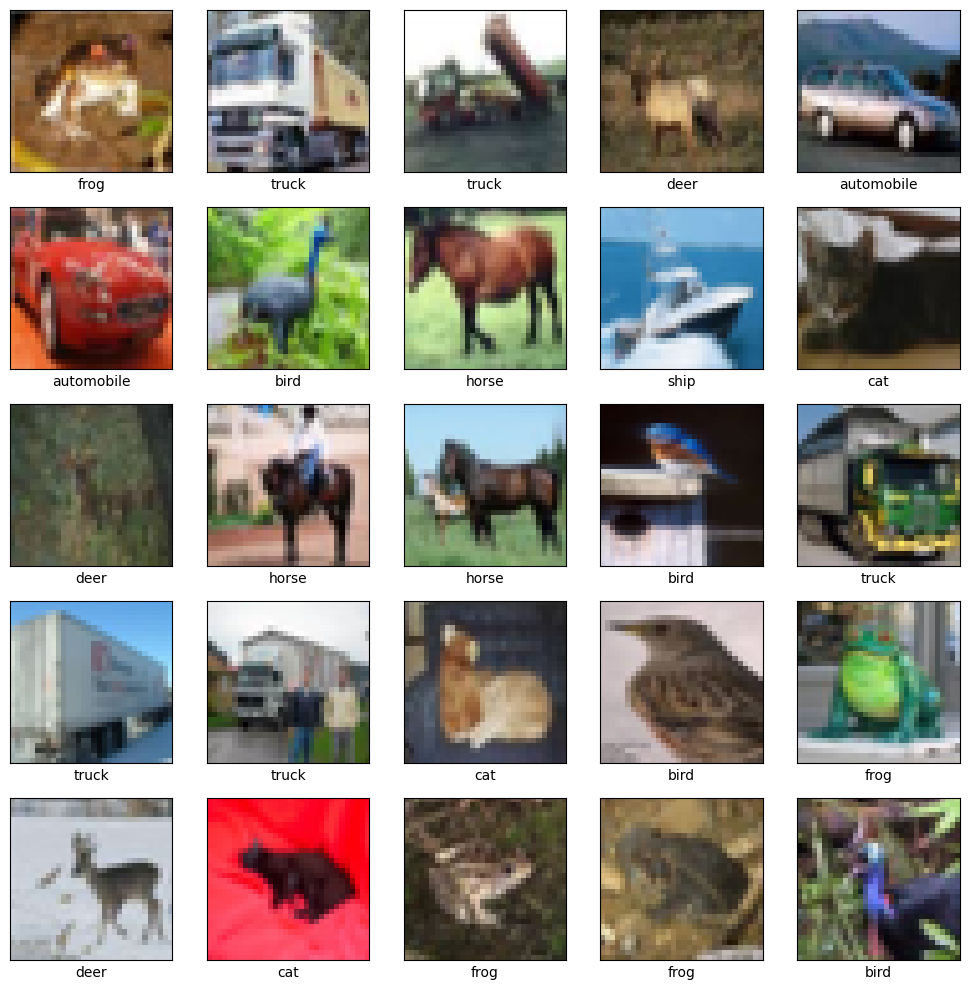

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2. 데이터 형태 확인
print("Training Data Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Data Shape:", X_test.shape)
print("Test Labels Shape:", y_test.shape)
print("\nPixel value range:", X_train.min(), "to", X_train.max())

plt.figure(figsize=(10, 10))
for i in range(25):  # 5x5 그리드
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras import Input, Model
from tensorflow.keras import layers

# 3. 모델 구성
inputs = Input(shape=(32,32,3))

x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.25)(x)

x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.25)(x)

x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(rate=0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(units=64, activation='relu')(x)
x = layers.Dropout(rate=0.5)(x)
outputs = layers.Dense(units=10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 구조 확인
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0   

In [24]:
# 6. 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

# 7. 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 1.9299 - accuracy: 0.2955 - val_loss: 1.5907 - val_accuracy: 0.4163 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 2s 4ms/step - loss: 1.5247 - accuracy: 0.4394 - val_loss: 1.2739 - val_accuracy: 0.5528 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 2s 4ms/step - loss: 1.3424 - accuracy: 0.5162 - val_loss: 1.1150 - val_accuracy: 0.5941 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 2s 4ms/step - loss: 1.2360 - accuracy: 0.5619 - val_loss: 1.0511 - val_accuracy: 0.6249 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 2s 4ms/step - loss: 1.1464 - accuracy: 0.5958 - val_loss: 1.0866 - val_accuracy: 0.6219 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 2s 4ms/step - loss: 1.0793 - accuracy: 0.6230 - val_loss: 0.9352 - val_accuracy: 0.6712 - lr: 0.0010
Epoch 7/100
625/625 [==============================] - 2s 4ms/st

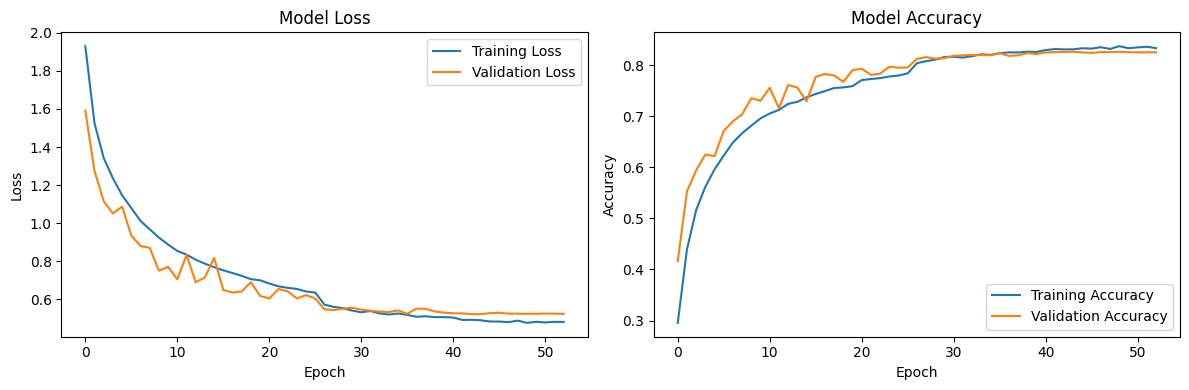

In [26]:
# 8. 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# 9. 테스트 세트 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - loss: 0.5491 - accuracy: 0.8220 - 511ms/epoch - 2ms/step

Test accuracy: 0.8220


In [96]:
from sklearn.datasets import load_digits  # 데이터셋
from sklearn.model_selection import train_test_split  # 데이터 분할

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential  # 모델 생성
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # 레이어
from tensorflow.keras.utils import to_categorical  # 원-핫 인코딩

In [97]:
digits = load_digits()
X = digits.images
y = digits.target

# 0-1 사이로 정규화
X = X / 16.0

print("원본 데이터 shape:", X.shape)  # (1797, 8, 8)
print("레이블 shape:", y.shape)       # (1797,)
print("레이블 클래스:", np.unique(y)) # [0 1 2 3 4 5 6 7 8 9]

원본 데이터 shape: (1797, 8, 8)
레이블 shape: (1797,)
레이블 클래스: [0 1 2 3 4 5 6 7 8 9]


변환된 입력 데이터 shape: (1797, 8, 8, 1)
변환된 레이블 shape: (1797, 10, 10)


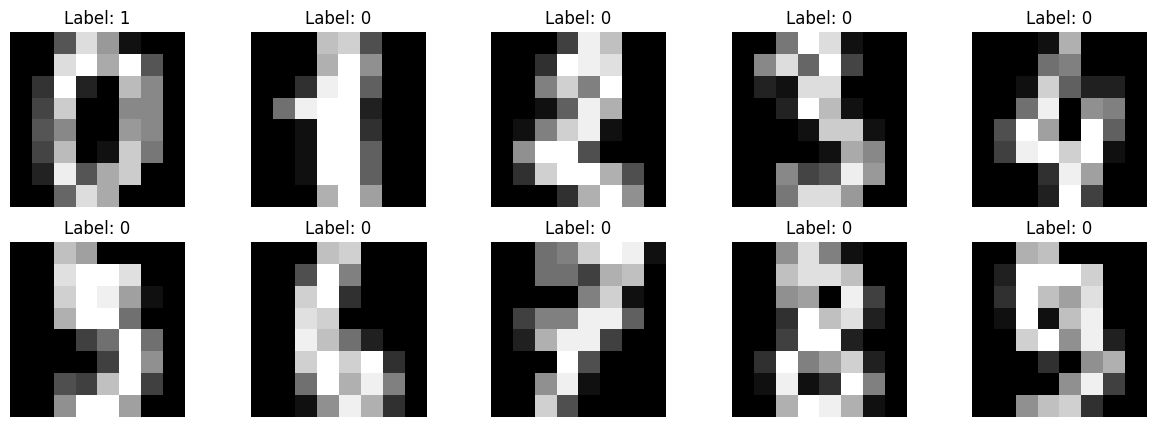

In [100]:
# 입력 데이터 reshape: (samples, height, width) → (samples, height, width, channels)
X = X.reshape(-1, 8, 8, 1)  # 흑백 이미지이므로 채널 1개

# 레이블 원-핫 인코딩
y = to_categorical(y, 10)  # 10개의 클래스

print("변환된 입력 데이터 shape:", X.shape)    # (1797, 8, 8, 1)
print("변환된 레이블 shape:", y.shape)         # (1797, 10)

# 데이터 확인
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f'Label: {np.argmax(y[i])}')
    plt.axis('off')
plt.show()

In [102]:
# 먼저 데이터 분할 (원-핫 인코딩 전)
X_train, X_test, y_train, y_test = train_test_split(
    X, digits.target,  # 원본 레이블 사용
    test_size=0.2,
    random_state=42,
    stratify=digits.target  # 원본 레이블로 stratify
)

# 그 다음 레이블 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("학습 데이터 shape:", X_train.shape)    # (1437, 8, 8, 1)
print("학습 레이블 shape:", y_train.shape)    # (1437, 10)
print("테스트 데이터 shape:", X_test.shape)   # (360, 8, 8, 1)
print("테스트 레이블 shape:", y_test.shape)   # (360, 10)

학습 데이터 shape: (1437, 8, 8, 1)
학습 레이블 shape: (1437, 10)
테스트 데이터 shape: (360, 8, 8, 1)
테스트 레이블 shape: (360, 10)


In [103]:
# 1. 모델 생성
model = Sequential()

# 2. 레이어 하나씩 추가
# Convolution + ReLU
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(8,8,1)))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected + Softmax
model.add(Dense(10, activation='softmax'))

# 모델 구조 확인
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 16)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 10)                1450      
                                                                 
Total params: 1610 (6.29 KB)
Trainable params: 1610 (6.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),              # 옵티마이저
    loss='categorical_crossentropy',# 손실 함수 (다중 분류)
    metrics=['accuracy']            # 평가 지표
)

# Early Stopping 추가
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 모델 학습
history = model.fit(
    X_train, y_train,              # 학습 데이터
    epochs=30,                     # 학습 횟수
    batch_size=32,                 # 배치 크기
    validation_split=0.2,          # 검증 데이터 비율
    callbacks=[early_stopping]      # Early Stopping 콜백 추가
)

Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9722
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9688
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9688
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9688
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9688
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9688
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9688
Epoch 8/100
3

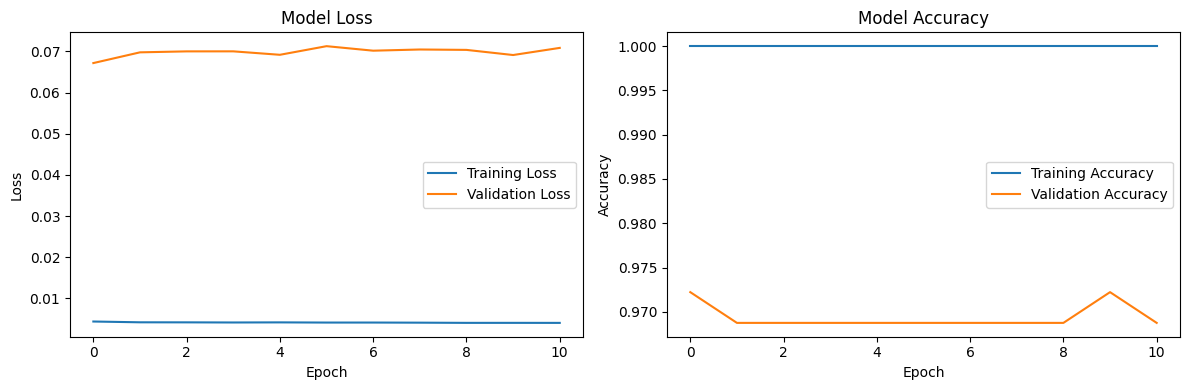

In [111]:
# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [112]:
# 테스트 데이터로 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# 몇 가지 샘플 예측 확인
predictions = model.predict(X_test[:5])
for i in range(5):
    print(f"\nSample {i+1}:")
    print(f"Predicted digit: {np.argmax(predictions[i])}")
    print(f"Actual digit: {np.argmax(y_test[i])}")

Test accuracy: 0.9694
1/1 [==============================] - 0s 54ms/step

Sample 1:
Predicted digit: 5
Actual digit: 5

Sample 2:
Predicted digit: 2
Actual digit: 2

Sample 3:
Predicted digit: 8
Actual digit: 8

Sample 4:
Predicted digit: 6
Actual digit: 1

Sample 5:
Predicted digit: 7
Actual digit: 7
